In [1]:
from result import get_result

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

OUTPUT = "data/results/"

In [2]:
# # this will cause a bunch of warnings, but that's (sort of) normal.
# # it's due to how the causal accuracy is calculated, if a pag contains only
# # circlemarks then it tries to divide by zero, but the nice part about that is that
# # that score then gets ignored if you groupby.mean with pandas

# # this also takes a while...
# df_nodes = get_result(model_args = [(5, 0.6, 1), (10, 0.25, 2), (15, 0.16, 3)])

# df_sparsity = get_result(model_args = [(10, 0.2, 2), (10, 0.25, 2), (10, 0.3, 2)])

# #df_probs = get_result(min_probs = [0, 10 ** -5, 0.01, 0.1, 0.5, 0.7, 0.9])
# df_probs = get_result(models=np.arange(50), min_probs = [0, 0.01, 0.1, 0.5, 0.7, 0.9])

# df_skel = get_result(skel=[False, True])

# df_std = get_result()

# df = pd.concat([df_nodes, df_sparsity, df_probs, df_skel])

# df_nodes.to_pickle('data/results/df_nodes.pkl')
# df_sparsity.to_pickle('data/results/df_sparsity.pkl')
# df_probs.to_pickle('data/results/df_probs.pkl')
# df_skel.to_pickle('data/results/df_skel.pkl')
# df_std.to_pickle('data/results/df_std.pkl')

# df.to_pickle('data/results/df.pkl')

In [3]:
df = pd.read_pickle('data/results/df.pkl')
df_nodes = pd.read_pickle('data/results/df_nodes.pkl')
df_sparsity = pd.read_pickle('data/results/df_sparsity.pkl')
df_probs = pd.read_pickle('data/results/df_probs.pkl')
df_skel = pd.read_pickle('data/results/df_skel.pkl')
df_std = pd.read_pickle('data/results/df_std.pkl')

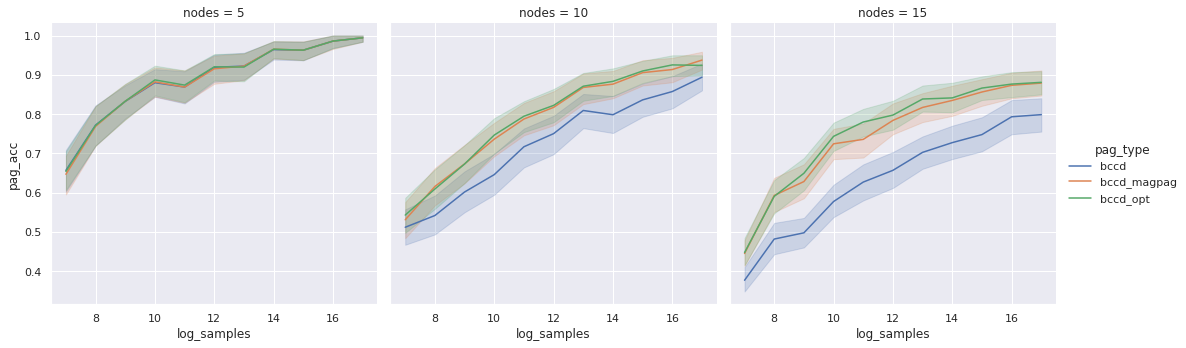

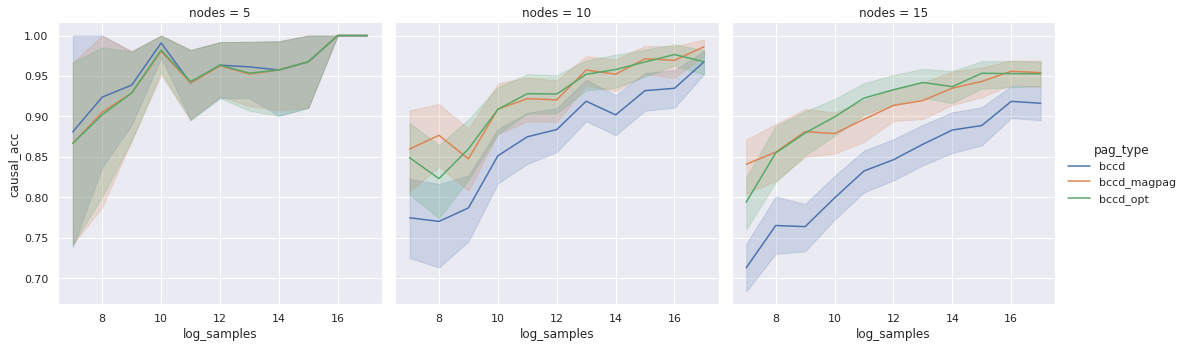

In [4]:
df1 = df_nodes.copy()
g = sns.relplot(data=df1, kind="line", x='log_samples', y='pag_acc', hue='pag_type', col="nodes")
g.savefig(OUTPUT + "nodes_pag_acc.pdf")

g = sns.relplot(data=df1, kind="line", x='log_samples', y='causal_acc', hue='pag_type', col="nodes")
g.savefig(OUTPUT + "nodes_causal_acc.pdf")

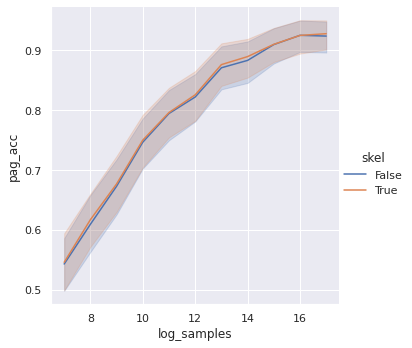

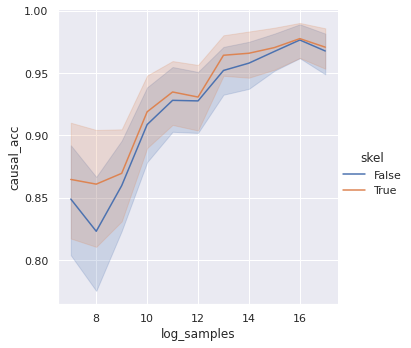

In [5]:
df1 = df_skel.copy()
df1 = df1[df1["pag_type"] == "bccd_opt"]
g = sns.relplot(data=df1, kind="line", x='log_samples', y='pag_acc', hue='skel')
g.savefig(OUTPUT + "skel_pag_acc.pdf")

g = sns.relplot(data=df1, kind="line", x='log_samples', y='causal_acc', hue='skel')
g.savefig(OUTPUT + "skel_causal_acc.pdf")

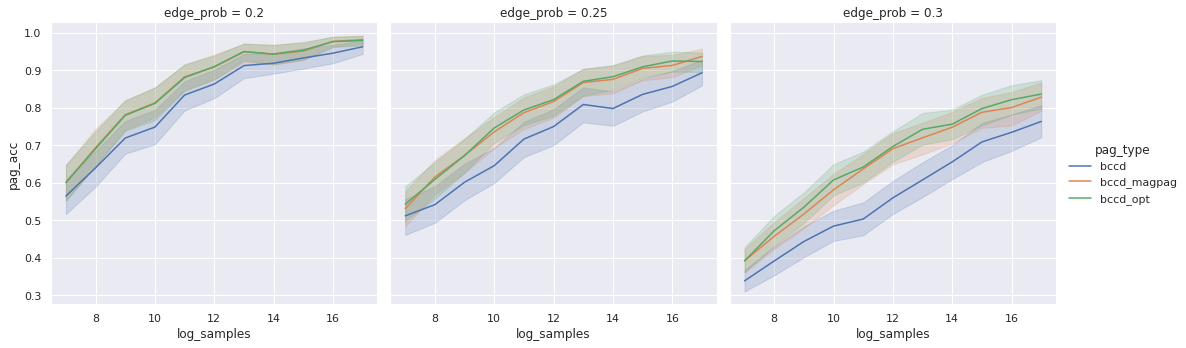

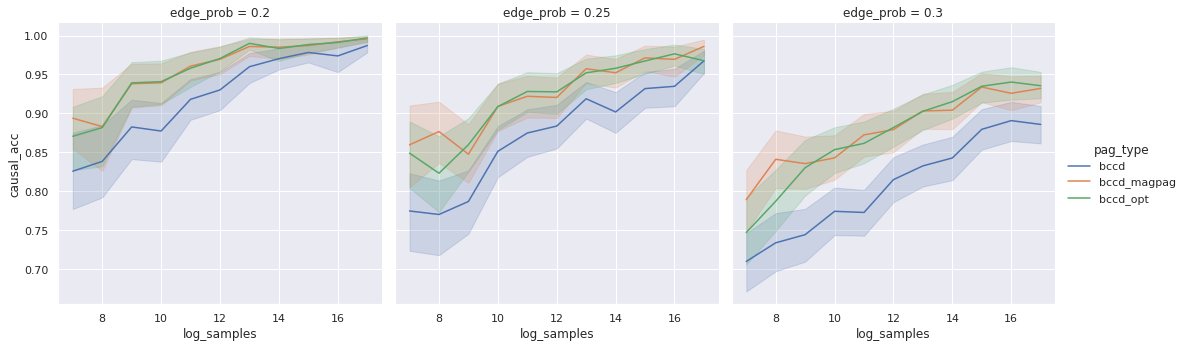

In [6]:
df1 = df_sparsity.copy()
g = sns.relplot(data=df1, kind="line", x='log_samples', y='pag_acc', hue='pag_type', col="edge_prob")
g.savefig(OUTPUT + "sparsity_pag_acc.pdf")

g = sns.relplot(data=df1, kind="line", x='log_samples', y='causal_acc', hue='pag_type', col="edge_prob")
g.savefig(OUTPUT + "sparsity_causal_acc.pdf")

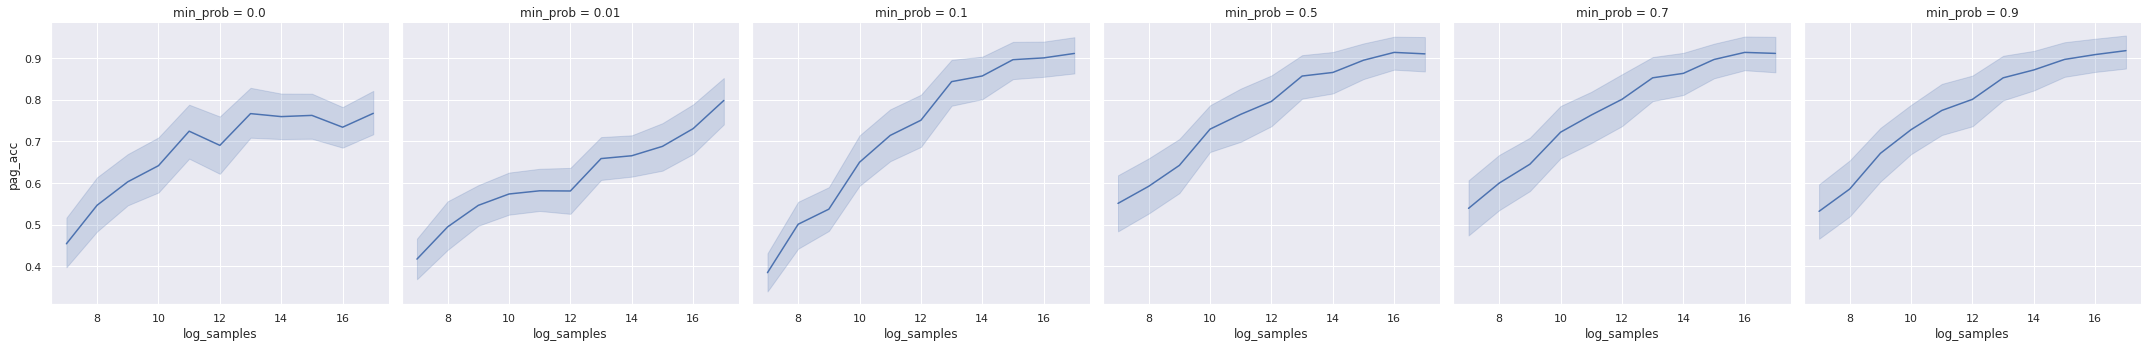

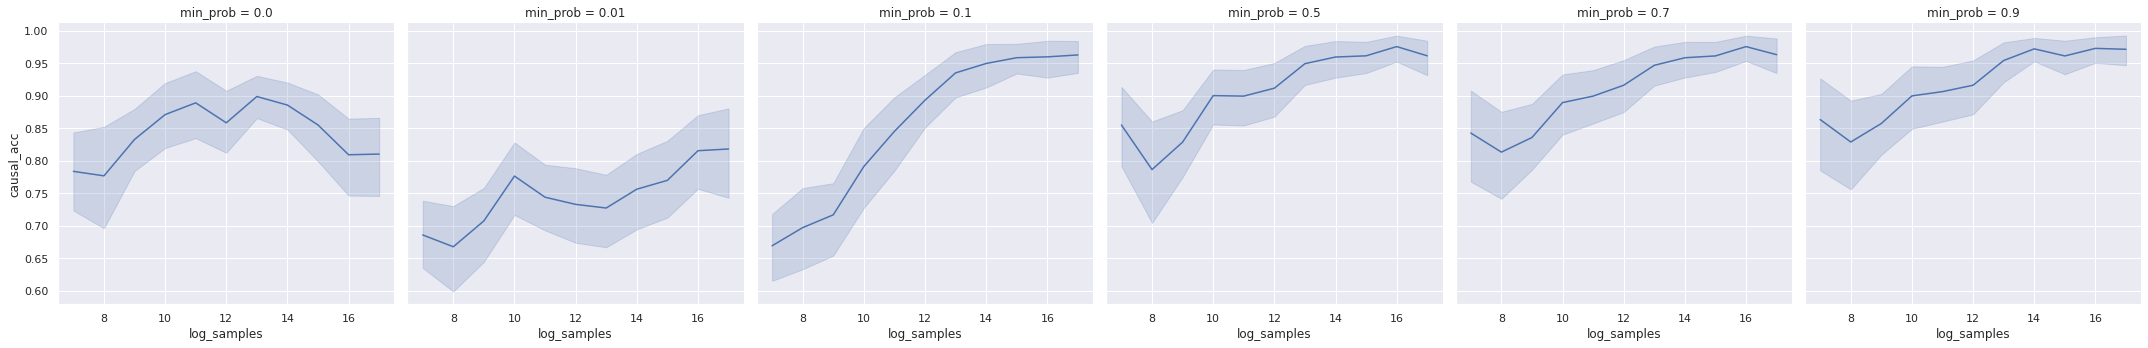

In [7]:
df1 = df_probs.copy()
df1["min_prob"] = df1["min_prob"].apply(round, ndigits=3)
df1 = df1[df1["pag_type"] == "bccd_opt"]
g = sns.relplot(data=df1, kind="line", x='log_samples', y='pag_acc', col='min_prob')
g.savefig(OUTPUT + "min_prob_pag_acc.pdf")

g = sns.relplot(data=df1, kind="line", x='log_samples', y='causal_acc', col='min_prob')
g.savefig(OUTPUT + "min_prob_causal_acc.pdf")

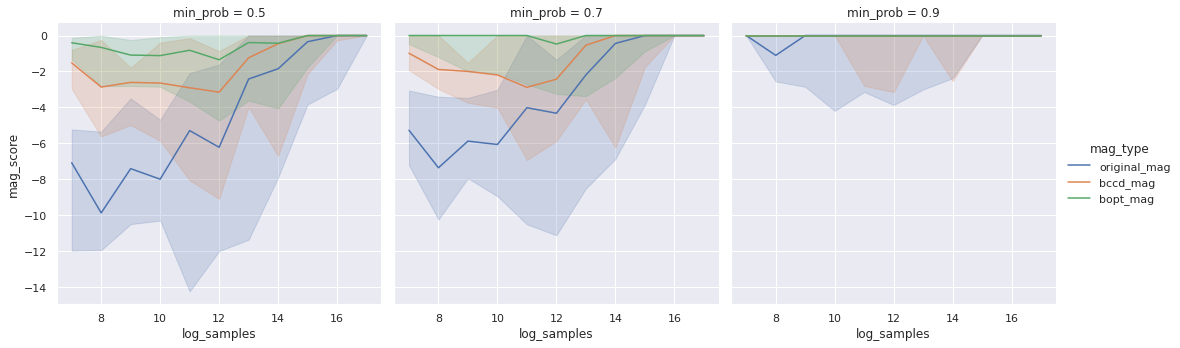

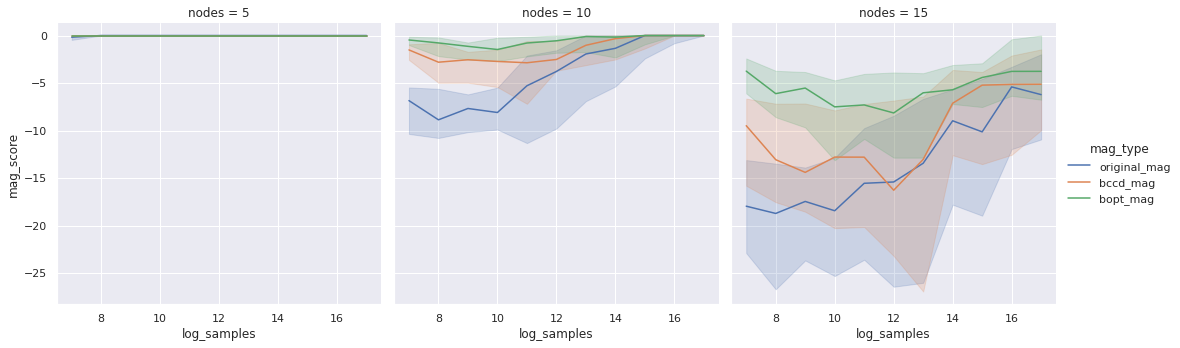

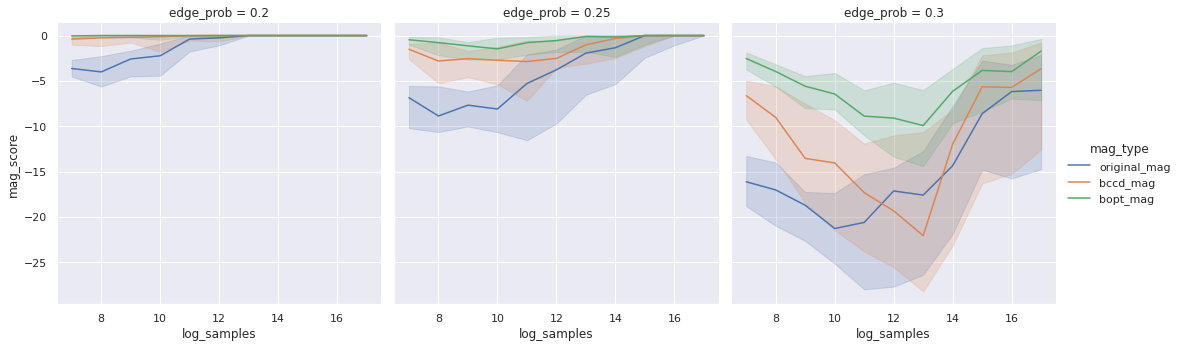

In [8]:
df1 = df_probs[df_probs['min_prob'] > 0.4]
g = sns.relplot(data=df1, x="log_samples", y="mag_score", hue="mag_type", col="min_prob", kind="line", estimator=np.median)
g.savefig(OUTPUT + "mag_score_prob.pdf")

g = sns.relplot(data=df_nodes, x="log_samples", y="mag_score", hue="mag_type", col="nodes", kind="line", estimator=np.median)
g.savefig(OUTPUT + "mag_score_nodes.pdf")

g = sns.relplot(data=df_sparsity, x="log_samples", y="mag_score", hue="mag_type", col="edge_prob", kind="line", estimator=np.median)
g.savefig(OUTPUT + "mag_score_sparsity.pdf")

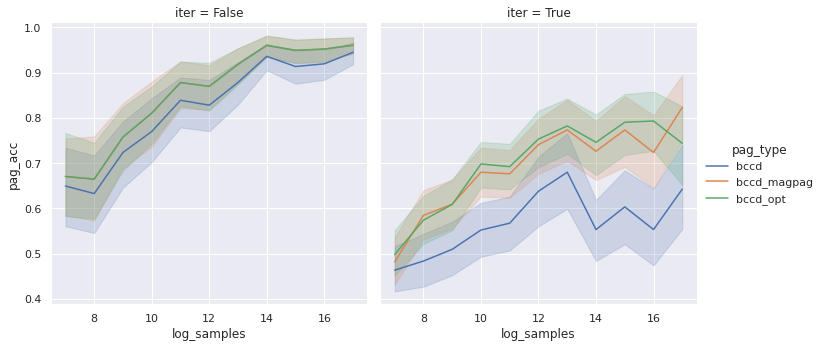

In [9]:
df_bool_iter = df_std.copy()
df_bool_iter["iter"] = df_bool_iter["iter"] > 0
g = sns.relplot(data=df_bool_iter, x="log_samples", y="pag_acc", hue="pag_type", col="iter", kind="line")
g.savefig(OUTPUT + "iter_pag_acc.pdf")

In [29]:
table_iter = df_std[df_std["pag_type"] == "bccd_opt"].groupby("iter").count()["nodes"]
table_iter.to_csv(OUTPUT + "table_iter.csv")

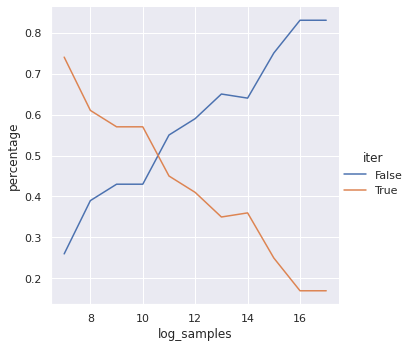

In [28]:
table_iter_bool = df_bool_iter[df_bool_iter["pag_type"] == "bccd_opt"].groupby(["log_samples", "iter"]).count()["nodes"].astype(int)/100

table_iter_bool = table_iter_bool.reset_index().rename(columns={"nodes": "percentage"})
table_iter_bool.to_csv(OUTPUT + "table_iter_bool.csv")

g = sns.relplot(data=table_iter_bool, x = "log_samples", y="percentage", hue="iter", kind="line")
g.savefig(OUTPUT + "iter_bool.pdf")

In [31]:
# TODO: table with the iterations and whether they change the pag class